# 📦 Dataset Summary: Online Retail Transactional Data

Time Period: 01/12/2010 to 09/12/2011

Business Type: UK-based, registered non-store online retail, primarily selling unique all-occasion gifts

Customer Base: Includes wholesalers

📊 Dataset Characteristics
Type: Multivariate, Sequential, Time-Series

Tasks: Suitable for Classification and Clustering

Missing Values: ❌ No missing values

Instances: 541,909 rows (transactions)

Features: 6 main attributes

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
from matplotlib import style
style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.shape

(541909, 8)

In [4]:
df.drop_duplicates(inplace=True) #removing duplicated rows
df.dropna(inplace=True) # Removing missing values
df.shape

(401604, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [7]:
num_rows = df.shape[0]
print("% of entries with Quantity less than 0: ",  df[df['Quantity'] <0].shape[0] * 100 / num_rows)
print("% of entries with UnitPrices less than 0: ",  df[df['UnitPrice'] <0].shape[0]  * 100 / num_rows)

% of entries with Quantity less than 0:  2.209141343213713
% of entries with UnitPrices less than 0:  0.0


In [8]:
# The entries with UnitPrice less than 0 can be removed. No Customer ID.
df = df[df['UnitPrice'] >=0].reset_index()

In [9]:
# To deal with the negative quantities, since only a small percentage of the values are negative, we can
# just remove them. Other methods include replacing those values with the median or mean.

In [10]:
df1 = df[df['Quantity'] >=0].reset_index(drop = True)

In [11]:
df1.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df1['InvoiceDate'].dtype

dtype('<M8[ns]')

Text(0, 0.5, 'Number of sales')

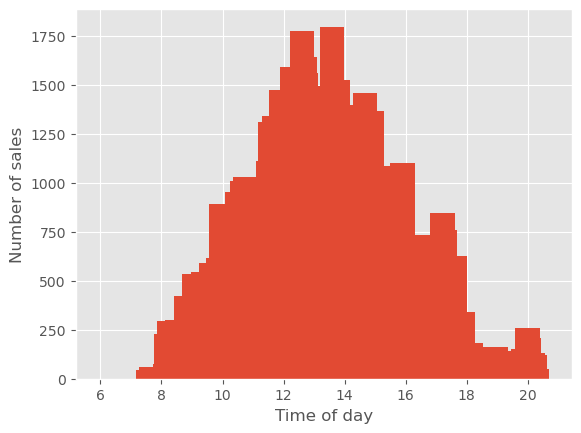

In [13]:
# Now lets do some fun stuff with the data... Just because!

vc = df1['InvoiceDate'].dt.time.value_counts()
times = vc.keys().tolist()
counts = vc.tolist()

def tfloat(time_dt):
    h, m, s = [int (x) for x in str(time_dt).split(":")]
    return h + (m/60) + (s/3600)

plt.figure()
plt.bar([tfloat(x) for x in times], counts)
plt.xlabel("Time of day")
plt.ylabel('Number of sales')

Text(0, 0.5, 'Number of sales')

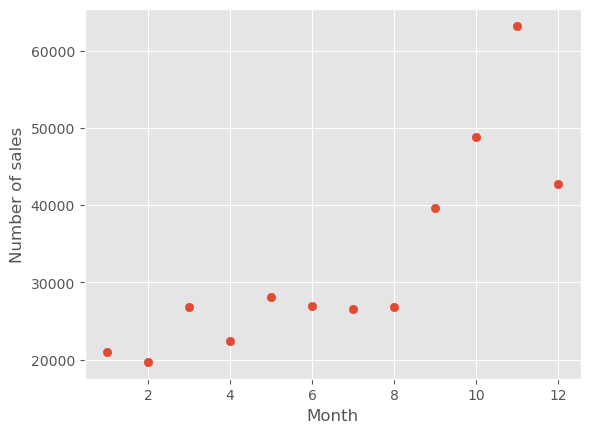

In [14]:
vc = df1['InvoiceDate'].dt.month.value_counts()
month = vc.keys().tolist()
counts = vc.tolist()
plt.figure()
plt.scatter(month, counts)
plt.xlabel("Month")
plt.ylabel('Number of sales')

In [15]:
df1['Month'] = df1['InvoiceDate'].dt.month
df1.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


In [16]:
df1['Total_price'] = df1['Quantity'] * df1['UnitPrice']

In [17]:
df1['Description'].value_counts().keys().tolist()[:5]

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'PARTY BUNTING']

In [18]:
df1['Country'].value_counts().keys().tolist()[:5]

['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain']

In [19]:
columns = ['Description', 'InvoiceDate', 'CustomerID', 'UnitPrice', 'Country']

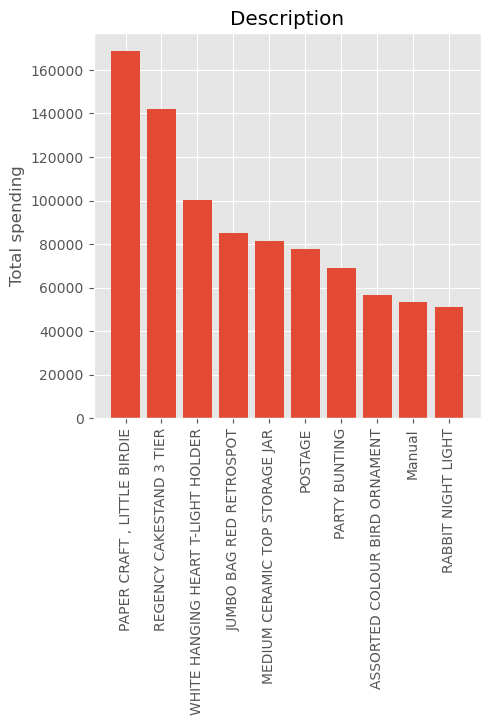

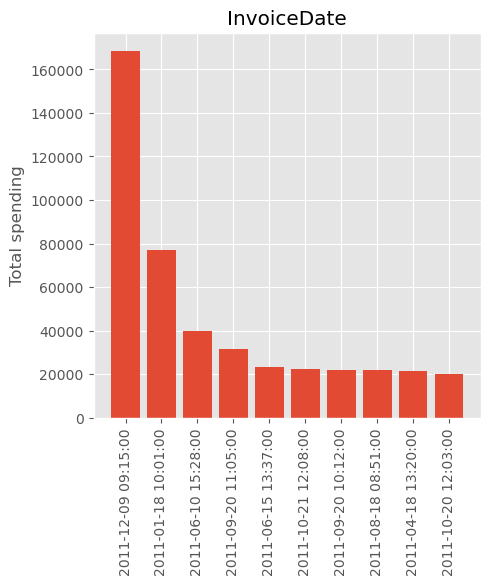

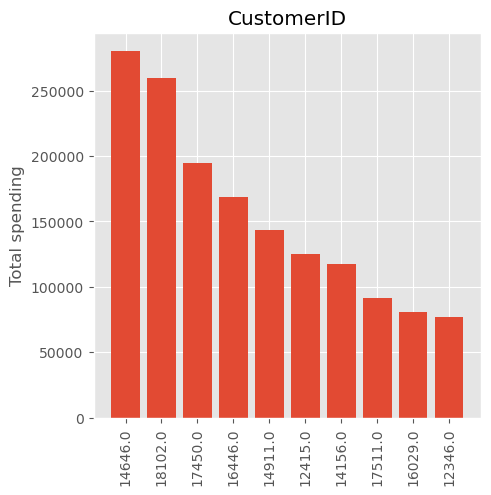

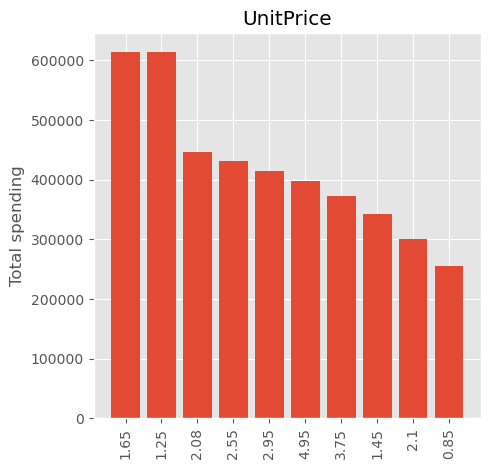

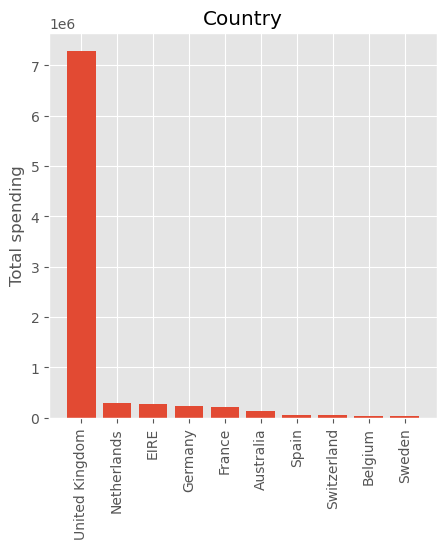

In [20]:
# Highest spend
highest_n_cust = 10
for col in columns:
    cust_price = df1.groupby(col)['Total_price'].sum().reset_index()\
             .sort_values(by='Total_price', ascending=False)
    highest_cust = cust_price.head(n=highest_n_cust)
    plt.figure(figsize=(5,5))
    plt.xticks(rotation=90)
    plt.bar( [str(x) for x in highest_cust[col].tolist() ], highest_cust['Total_price']);
    plt.title(col)
    plt.ylabel('Total spending')

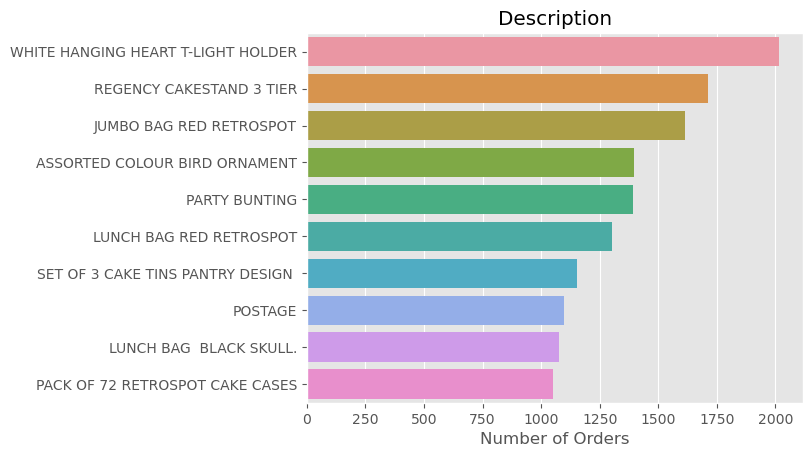

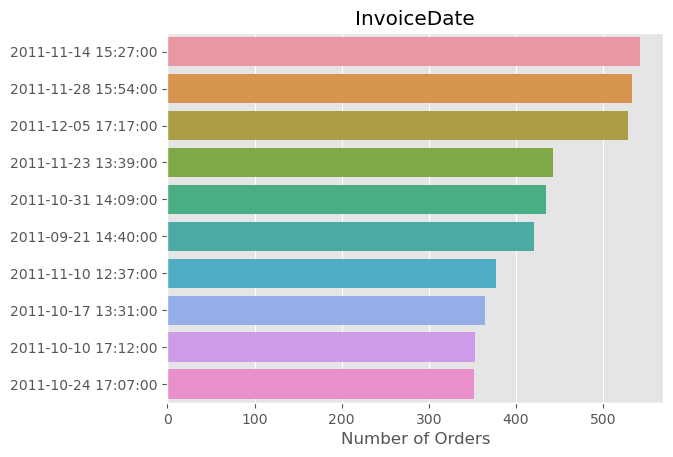

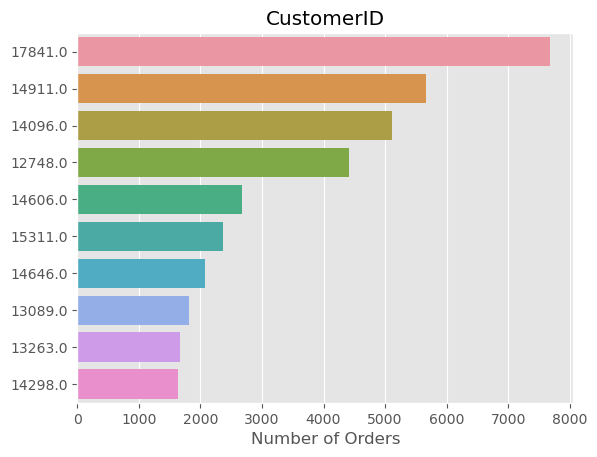

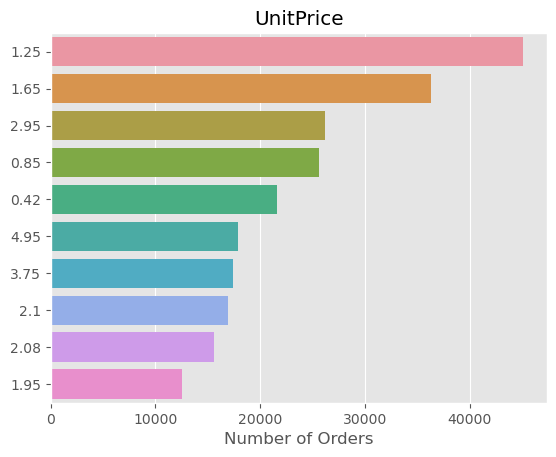

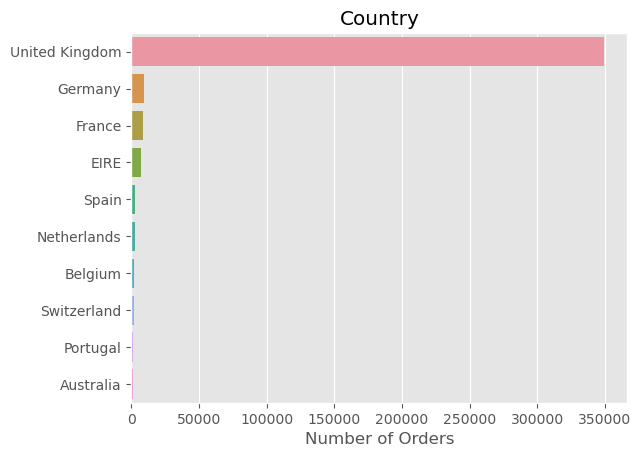

In [19]:
# Most frequent spending items.
for col in columns:
    col_count = df1[col].value_counts().head(highest_n_cust)
    plt.figure()
    sb.barplot(x= col_count.values, y=[str(x) for x in col_count.index])
    plt.title(col)
    plt.xlabel("Number of Orders")
    plt.show()

In [21]:
X = df1[["Total_price", "Quantity", "UnitPrice", "Country", "Description"]]
encoder = LabelEncoder()
X["Country"] = encoder.fit_transform(X["Country"])
X["Description"] = encoder.fit_transform(X["Description"])

X.head()

,Total_price,Quantity,UnitPrice,Country,Description
0,15.30,6,2.55,35,3698
1,20.34,6,3.39,35,3706
2,22.00,8,2.75,35,858
3,20.34,6,3.39,35,1804
4,20.34,6,3.39,35,2763


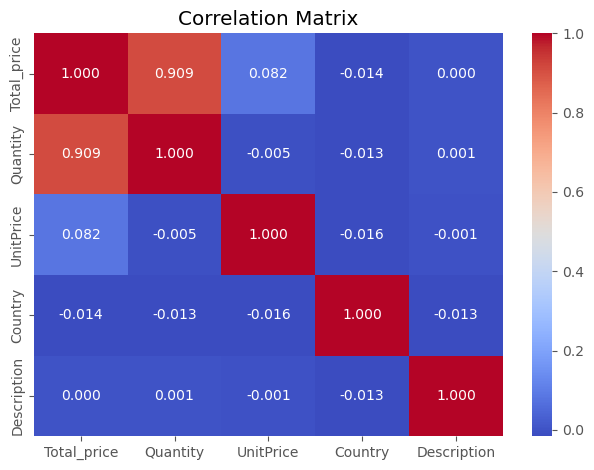

In [22]:
corr = X.corr()

sb.heatmap(corr, annot=True, fmt=".3f", cmap="coolwarm")# fmt formats the displayed values to 2 decimal places
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [23]:
q1 = df1["Quantity"].quantile(0.30)
q3 = df1["Quantity"].quantile(0.70)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df_qq = df1.loc[(df1["Quantity"] < upper_limit) & (df1["Quantity"] > lower_limit)]
q1 = df_qq["UnitPrice"].quantile(0.25)
q3 = df_qq["UnitPrice"].quantile(0.65)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df_qup = df_qq.loc[(df_qq["UnitPrice"] < upper_limit) & (df_qq["UnitPrice"] > lower_limit)]

In [24]:
encoder = LabelEncoder()
df_qup["Country"] = encoder.fit_transform(df_qup["Country"])
df_qup["Description"] = encoder.fit_transform(df_qup["Description"])

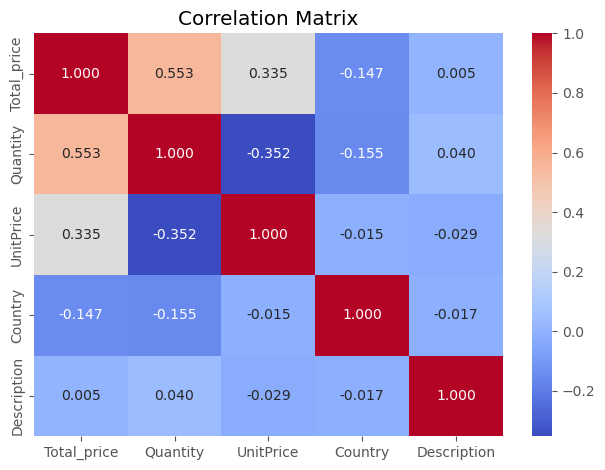

In [24]:
X = df_qup[["Total_price", "Quantity", "UnitPrice", "Country", "Description"]]
corr = X.corr()

sb.heatmap(corr, annot=True, fmt=".3f", cmap="coolwarm")# fmt formats the displayed values to 2 decimal places
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [25]:
scaler = StandardScaler()  # Initialize a StandardScaler
X = scaler.fit_transform(X)  # Apply standardization to X

In [28]:
inertia = []

for i in range(2, 11):  
    # Initialize K-Means with 'i' clusters and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=i, random_state=20)  
    
    # Fit K-Means to the data
    kmeans.fit(X)  
    
    # Append the inertia (WCSS) to the list
    inertia.append(kmeans.inertia_) 

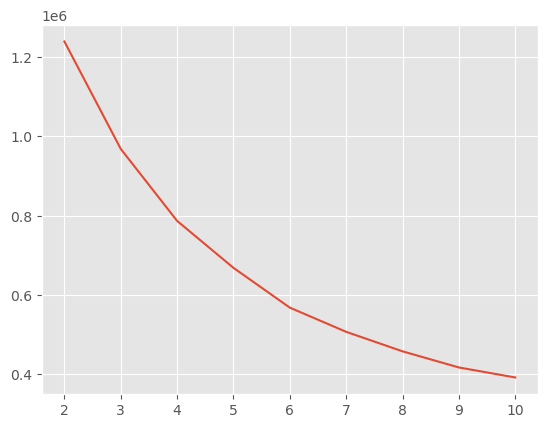

In [31]:
plt.plot(range(2, 11), inertia)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=20)  
df_qup['Cluster'] = kmeans.fit_predict(X)  

<Figure size 1500x1500 with 0 Axes>

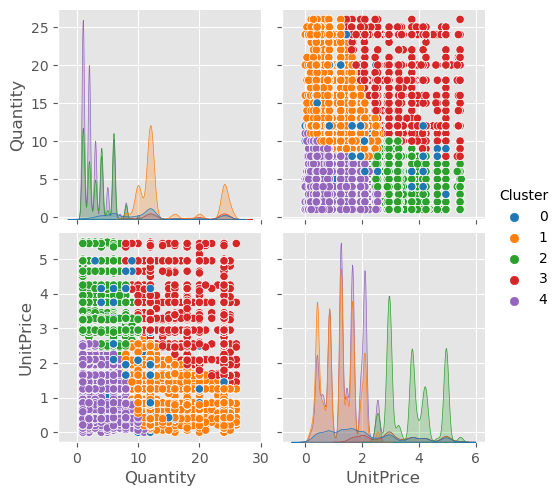

In [55]:
plt.figure(figsize=(15,15))
sb.pairplot(df_qup, hue='Cluster', vars=['Quantity', 'UnitPrice'], palette='tab10')

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

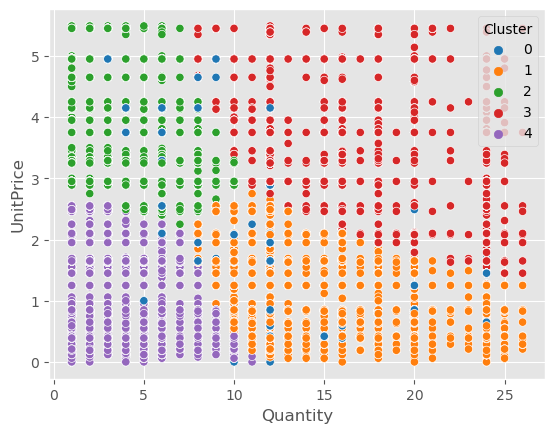

In [56]:
# centers = pd.DataFrame(kmeans.cluster_centers_)
# plt.scatter(x = centers[0], y = centers[1], s = 100, marker ='+' , c = 'black')
sb.scatterplot(data = df_qup, x = 'Quantity', y = 'UnitPrice', hue = 'Cluster', palette = 'tab10')

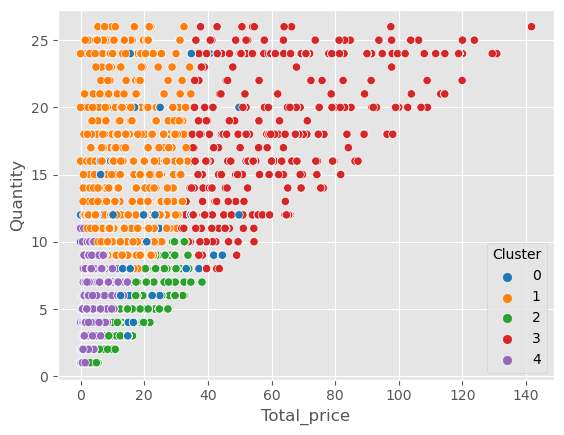

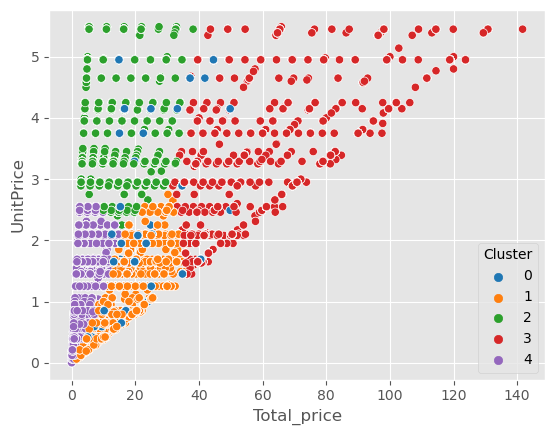

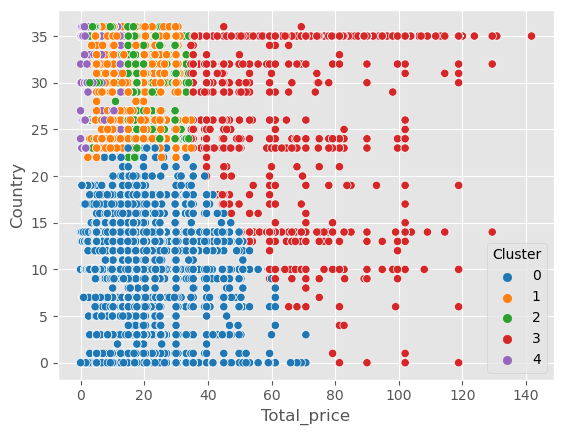

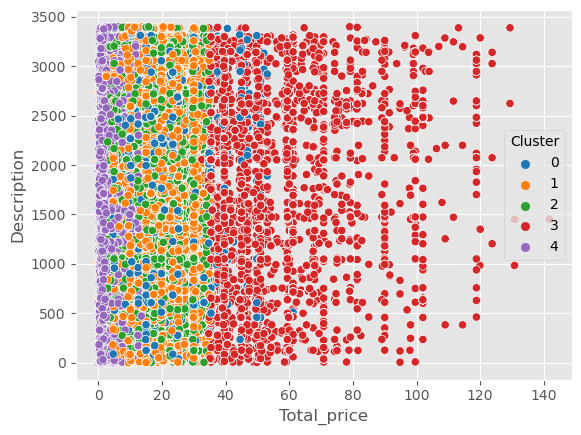

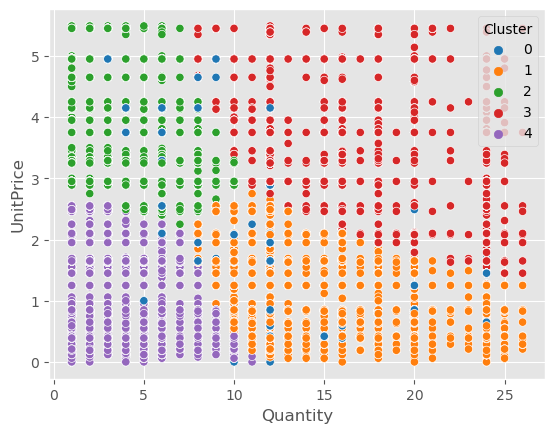

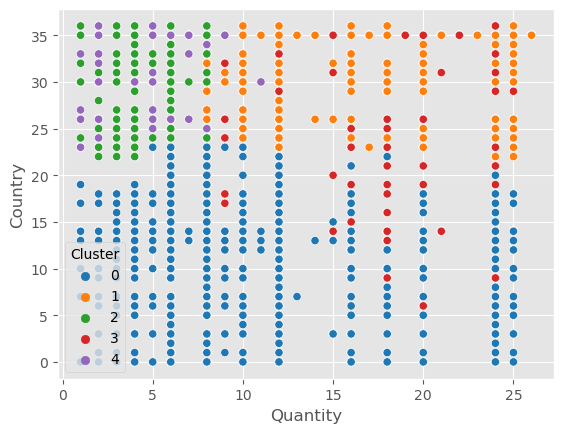

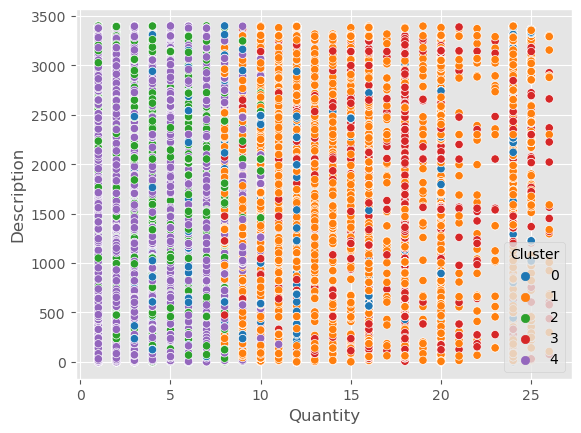

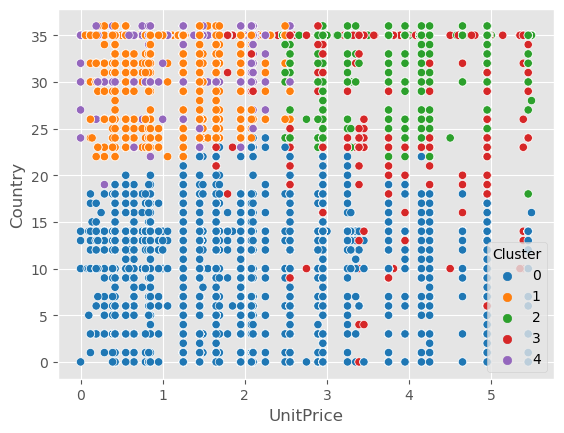

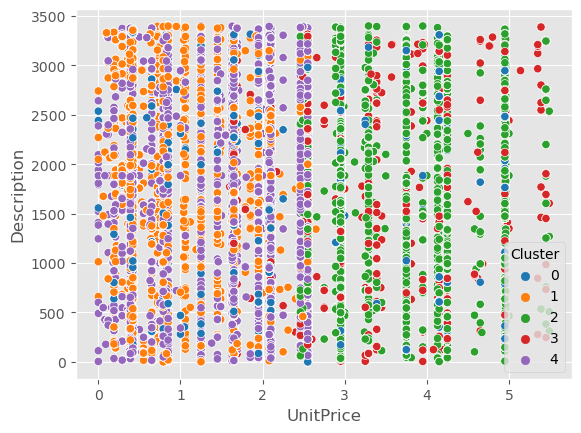

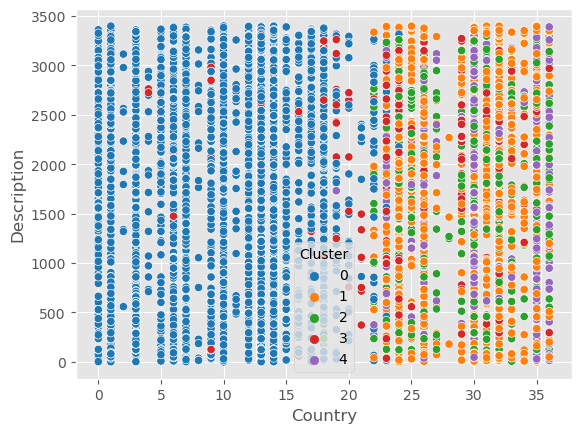

In [57]:
import itertools
pair_cluster = list(itertools.combinations(["Total_price", "Quantity", "UnitPrice", "Country", "Description"], 2))
for pair in pair_cluster:
    plt.figure()
    sb.scatterplot(data = df_qup, x = pair[0], y = pair[1], hue = 'Cluster', palette = 'tab10')

In [28]:
# Convert InvoiceDate to datetime
df_qup['InvoiceDate'] = pd.to_datetime(df_qup['InvoiceDate'])

# Filter out cancellations
df_qup = df_qup[~df_qup['InvoiceNo'].astype(str).str.startswith('C')]

# Drop missing CustomerID
df_qup = df_qup.dropna(subset=['CustomerID'])

In [29]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [30]:
# Group by CustomerID
rfm = df_qup.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'UnitPrice': lambda x: (x * df_qup.loc[x.index, 'Quantity']).sum()  # Monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)

In [31]:
rfm_scaled = scaler.fit_transform(rfm)

inertia_rfm = []

for i in range(2, 11):  
    # Initialize K-Means with 'i' clusters and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=i, random_state=20)  
    
    # Fit K-Means to the data
    kmeans.fit(rfm_scaled)  
    
    # Append the inertia (WCSS) to the list
    inertia_rfm.append(kmeans.inertia_) 

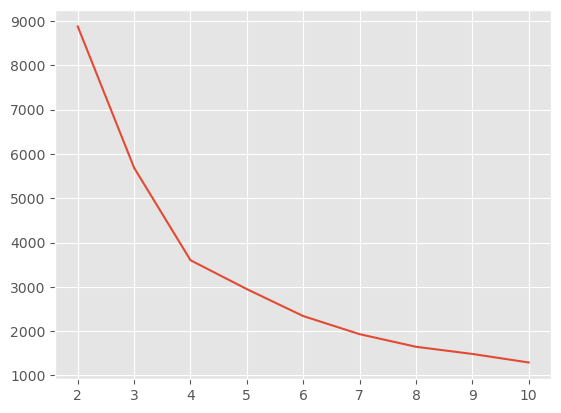

In [32]:
plt.plot(range(2, 11), inertia_rfm)

In [40]:
kmeans = KMeans(n_clusters=4, random_state=20)  
rfm['Cluster'] = kmeans.fit_predict(rfm) 

In [44]:
rfm.reset_index(inplace=True)

In [45]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  # Optional: how many customers in each cluster
}).rename(columns={'CustomerID': 'CustomerCount'})

cluster_summary = cluster_summary.sort_values(by='Monetary', ascending=False)
cluster_summary

,Recency,Frequency,Monetary,CustomerCount
Cluster,,,,
3,1.000000,192.000000,77777.890000,1
1,5.076923,57.846154,18368.410769,13
2,23.292517,12.229025,3636.550524,441
0,101.087540,2.767991,538.423723,3724


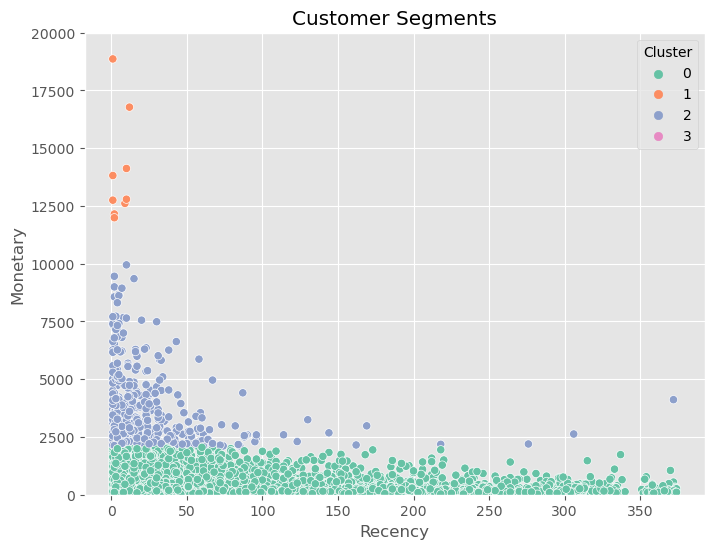

In [48]:

plt.figure(figsize=(8,6))
sb.scatterplot(
    data=rfm, 
    x='Recency', y='Monetary', 
    hue='Cluster', palette='Set2'
)
plt.title('Customer Segments')
plt.ylim(0,20000)
plt.show()

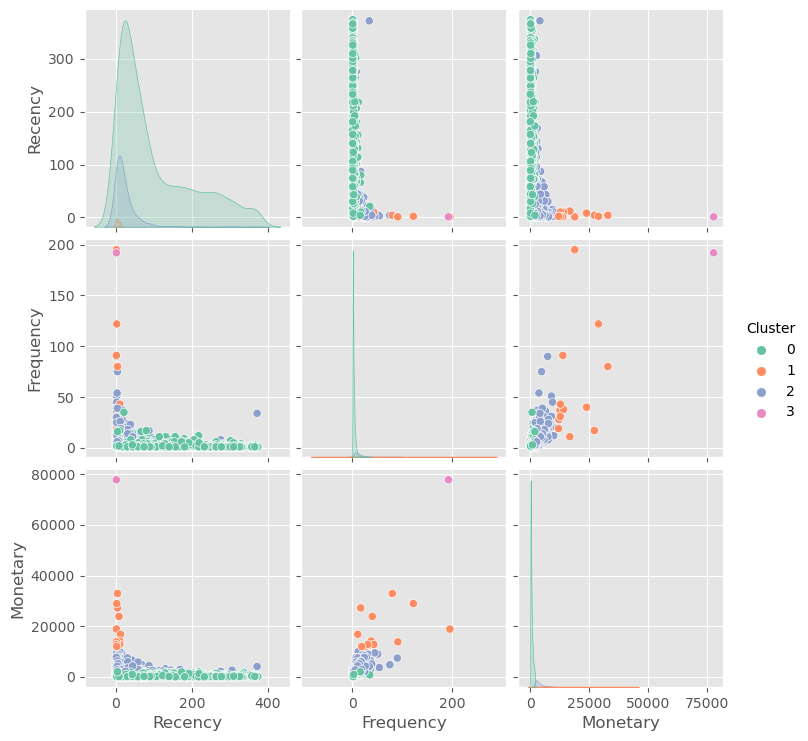

In [49]:
sb.pairplot(rfm, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='Set2')

In [51]:
rfm.to_csv("rfm_values_customerID.csv")

Insights:

Cluster 3: This is a very valuable customer - possibly a business buyer or wholesaler. Even though it's just one customer, they account for massive revenue. They should get VIP treatment.

Cluster 1: These are your best overall customers - frequent, high-spending, and very recent. They love the store and should be retained and rewarded with loyalty programs, early access, or upselling.

Cluster 2: These customers are fairly active and spend a decent amount. They are good candidates for growth marketing - maybe targeted promotions to increase frequency.

Cluster 0: These customers are either slipping away or infrequent bargain shoppers. They might respond to reactivation emails or discounts. Or, maybe they’re not high potential - worth flagging for minimal ad spend.

